### 加载数据

In [1]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [2]:
my_data <- mtcars[,c(1,3)]  # 选择第一到三列

### 加载前六行

In [3]:
head(my_data)

,mpg,disp
,<dbl>,<dbl>
Mazda RX4,21.0,160
Mazda RX4 Wag,21.0,160
Datsun 710,22.8,108
Hornet 4 Drive,21.4,258
Hornet Sportabout,18.7,360
Valiant,18.1,225


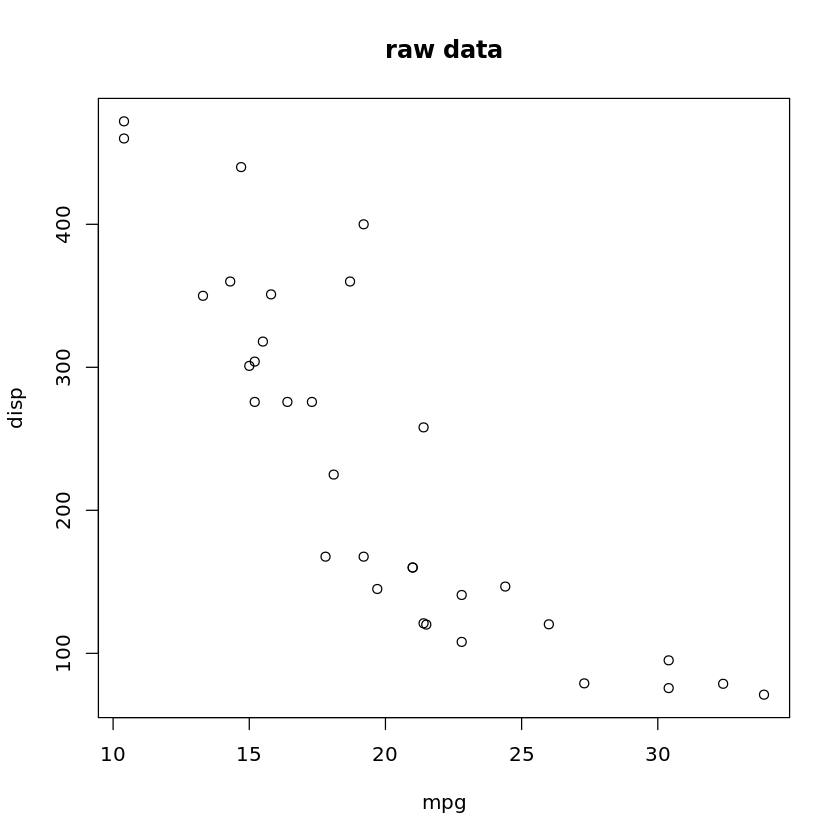

In [4]:
plot(my_data, main="raw data")

## 数据标准化

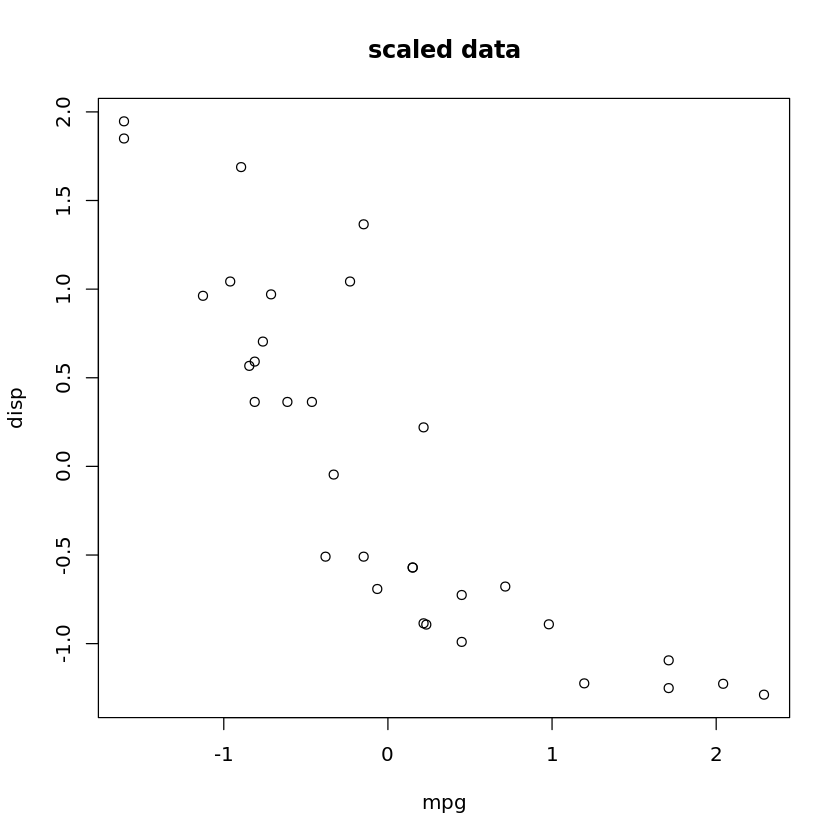

In [5]:
my_data1 <- scale(my_data, center = T, scale = T)
plot(my_data1, main = "scaled data")

### 主成分分析

In [6]:
mtcars.pca <- prcomp(my_data, center = FALSE, scale. = FALSE)  # 没有进行数据标准化
summary(mtcars.pca)

Importance of components:
                            PC1      PC2
Standard deviation     265.6246 14.39079
Proportion of Variance   0.9971  0.00293
Cumulative Proportion    0.9971  1.00000

In [7]:
mtcars.pca <- prcomp(my_data, center = TRUE, scale. = TRUE)  # 数据标准化
summary(mtcars.pca)

Importance of components:
                          PC1     PC2
Standard deviation     1.3592 0.39045
Proportion of Variance 0.9238 0.07622
Cumulative Proportion  0.9238 1.00000

In [8]:
mtcars.pca <- prcomp(my_data1, center = F,scale. = F)  # 使用标准化后的数据，不需要再次进行标准化
summary(mtcars.pca)

Importance of components:
                          PC1     PC2
Standard deviation     1.3592 0.39045
Proportion of Variance 0.9238 0.07622
Cumulative Proportion  0.9238 1.00000

In [9]:
mtcars.pca

Standard deviations (1, .., p=2):
[1] 1.3592466 0.3904467

Rotation (n x k) = (2 x 2):
            PC1       PC2
mpg  -0.7071068 0.7071068
disp  0.7071068 0.7071068

### 主成分分析之后的散点图

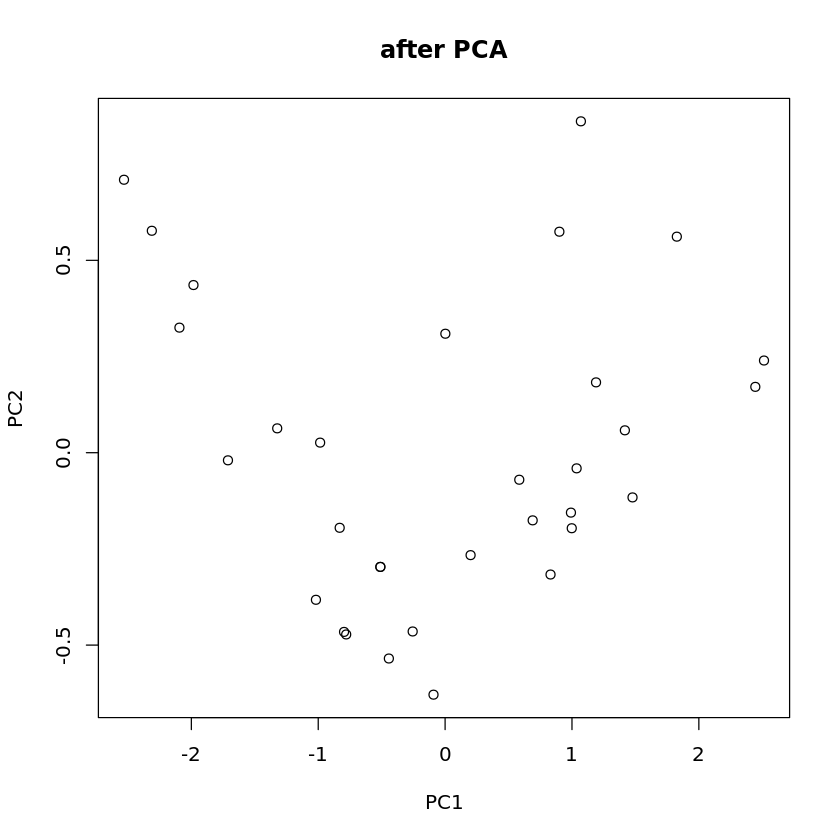

In [10]:
plot(mtcars.pca$x, main = "after PCA")

### 主成分分析后的双标图

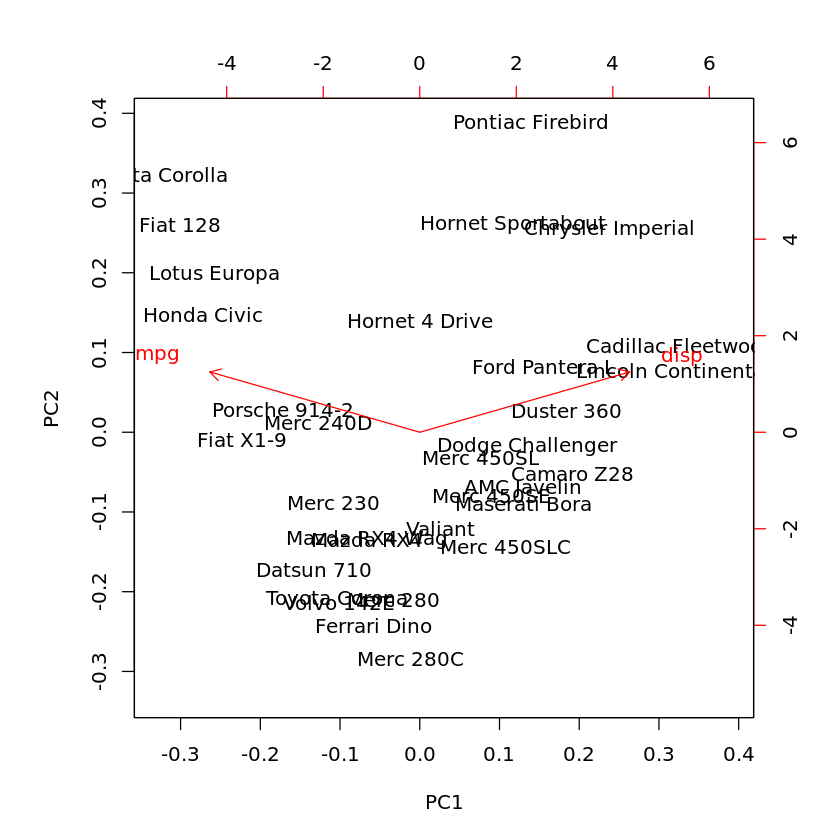

In [11]:
biplot(prcomp(my_data1))  # 数据关于主成分的散点图和原坐标在主成分下的方向

### 安装包依赖
- install.packages()

In [12]:
# install.packages("psych")

### 导包

In [13]:
library(psych)
head(USJudgeRatings, 5)  # 提取前五行

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [14]:
head(USJudgeRatings[, -1], 5)  # 去掉第一列

,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"AARONSON,L.H.",7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


### 悬崖碎石图
- scree（基于psych库）

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor extraction method.”

Parallel analysis suggests that the number of factors =  NA  and the number of components =  1 


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor extraction method.”

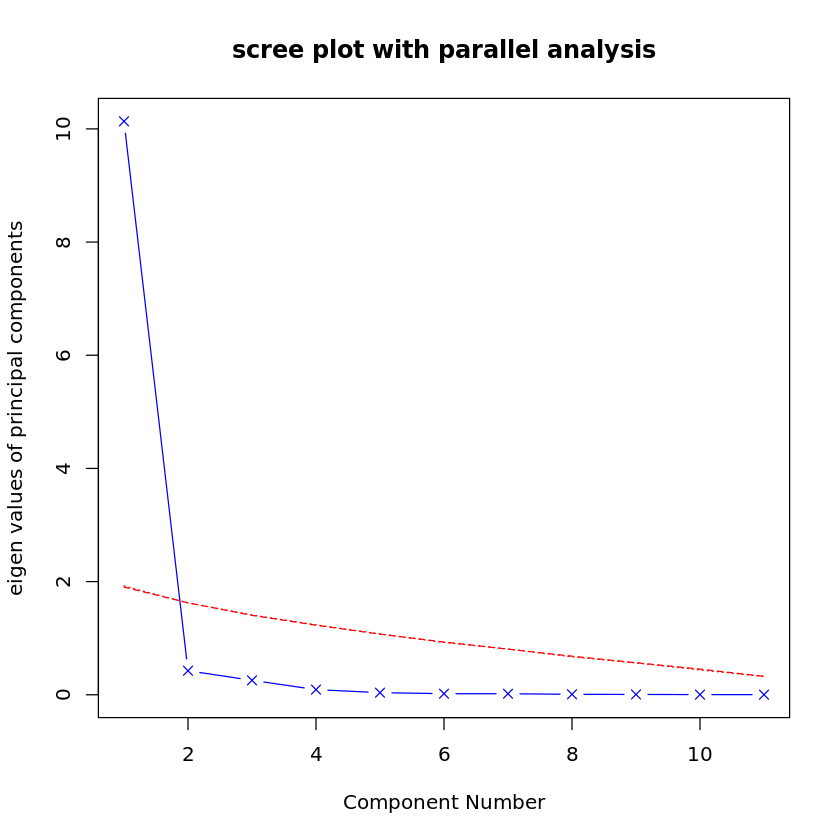

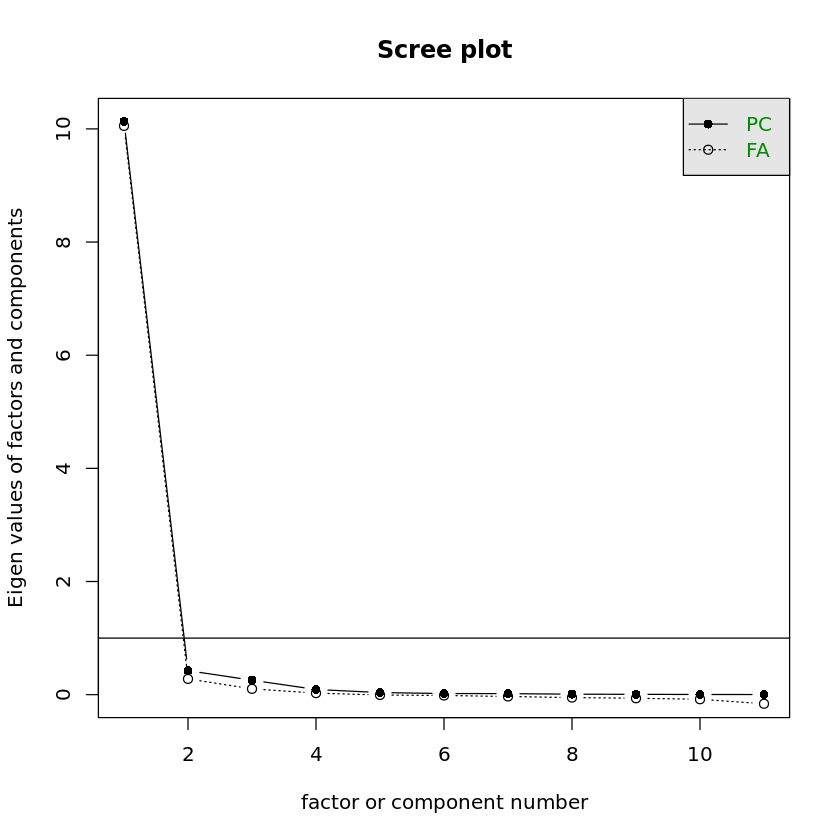

In [15]:
fa.parallel(USJudgeRatings[,-1], fa="pc", n.iter=100, show.legend=FALSE, main="scree plot with parallel analysis")
scree(USJudgeRatings[,-1])

### 提取主成分

In [16]:
pc <- principal(USJudgeRatings[,-1],nfactors=1)
pc

Principal Components Analysis
Call: principal(r = USJudgeRatings[, -1], nfactors = 1)
Standardized loadings (pattern matrix) based upon correlation matrix
      PC1   h2     u2 com
INTG 0.92 0.84 0.1565   1
DMNR 0.91 0.83 0.1663   1
DILG 0.97 0.94 0.0613   1
CFMG 0.96 0.93 0.0720   1
DECI 0.96 0.92 0.0763   1
PREP 0.98 0.97 0.0299   1
FAMI 0.98 0.95 0.0469   1
ORAL 1.00 0.99 0.0091   1
WRIT 0.99 0.98 0.0196   1
PHYS 0.89 0.80 0.2013   1
RTEN 0.99 0.97 0.0275   1

                 PC1
SS loadings    10.13
Proportion Var  0.92

Mean item complexity =  1
Test of the hypothesis that 1 component is sufficient.

The root mean square of the residuals (RMSR) is  0.04 
 with the empirical chi square  6.21  with prob <  1 

Fit based upon off diagonal values = 1

In [17]:
pc <- principal(USJudgeRatings[,-1],nfactors=1, score=TRUE)
pc$score


,PC1
"AARONSON,L.H.",-0.18579806
"ALEXANDER,J.M.",0.74698654
"ARMENTANO,A.J.",0.07047720
"BERDON,R.I.",1.13587650
"BRACKEN,J.J.",-2.15862110
"BURNS,E.B.",0.76694060
"CALLAHAN,R.J.",1.22568683
"COHEN,S.S.",-2.51306116
"DALY,J.J.",1.14950164
"DANNEHY,J.F.",0.32999401


In [18]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


### 获取当前路径

In [19]:
getwd()

[1] "/home/jupyter/R"

### 读取文件

In [20]:
d1 <- read.csv(file='./tab.csv', header=TRUE,fileEncoding="GB 2312")
d1

地区,人口密度.人.平方公里.,人均日生活用水量,供水普及率...,燃气普及率...,人均道路面积.平方米.,排水管道暗渠密度.公里.平方公里.,人均公园绿地面积.平方米.,绿化覆盖率...,绿地率...
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,NA,NA,NA,NA,NA,NA,NA
全国,4947,98.58,81.73,46.44,12.26,6.75,2.37,15.42,8.64
北京,4139,102.31,85.43,57.32,13.92,7.13,5.27,21.97,12.77
天津,4219,88.70,94.93,66.95,16.25,6.45,1.21,18.19,7.46
河北,4582,65.82,81.59,37.44,10.84,2.67,0.52,9.60,4.38
山西,5240,72.98,86.57,14.28,12.48,5.12,0.91,20.17,8.03
内蒙古,3185,75.77,60.38,15.80,10.23,1.99,1.58,9.43,4.46
辽宁,3726,81.34,72.27,29.92,12.24,3.96,1.14,10.62,3.17
吉林,3880,76.10,73.25,20.90,10.83,1.99,0.94,5.45,2.13


### 取出/放回数据

In [21]:
attach(d1) 
# detach(d1)

### 查看&修改数据名称

In [22]:
names(d1)
names(d1)=paste('x',1:10,sep='')
attach(d1)

[1] "地区"                            "人口密度.人.平方公里."          
 [3] "人均日生活用水量"                "供水普及率..."                  
 [5] "燃气普及率..."                   "人均道路面积.平方米."           
 [7] "排水管道暗渠密度.公里.平方公里." "人均公园绿地面积.平方米."       
 [9] "绿化覆盖率..."                   "绿地率..."

### 去掉缺失值与非数值变量

In [23]:
head(d1)
d1=d1[-c(1,28), -1] # 
head(d1)

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,NA,NA,NA,NA,NA,NA,NA
全国,4947,98.58,81.73,46.44,12.26,6.75,2.37,15.42,8.64
北京,4139,102.31,85.43,57.32,13.92,7.13,5.27,21.97,12.77
天津,4219,88.70,94.93,66.95,16.25,6.45,1.21,18.19,7.46
河北,4582,65.82,81.59,37.44,10.84,2.67,0.52,9.60,4.38
山西,5240,72.98,86.57,14.28,12.48,5.12,0.91,20.17,8.03


,x2,x3,x4,x5,x6,x7,x8,x9,x10
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,4947,98.58,81.73,46.44,12.26,6.75,2.37,15.42,8.64
3,4139,102.31,85.43,57.32,13.92,7.13,5.27,21.97,12.77
4,4219,88.70,94.93,66.95,16.25,6.45,1.21,18.19,7.46
5,4582,65.82,81.59,37.44,10.84,2.67,0.52,9.60,4.38
6,5240,72.98,86.57,14.28,12.48,5.12,0.91,20.17,8.03
7,3185,75.77,60.38,15.80,10.23,1.99,1.58,9.43,4.46


### 多变量散点图

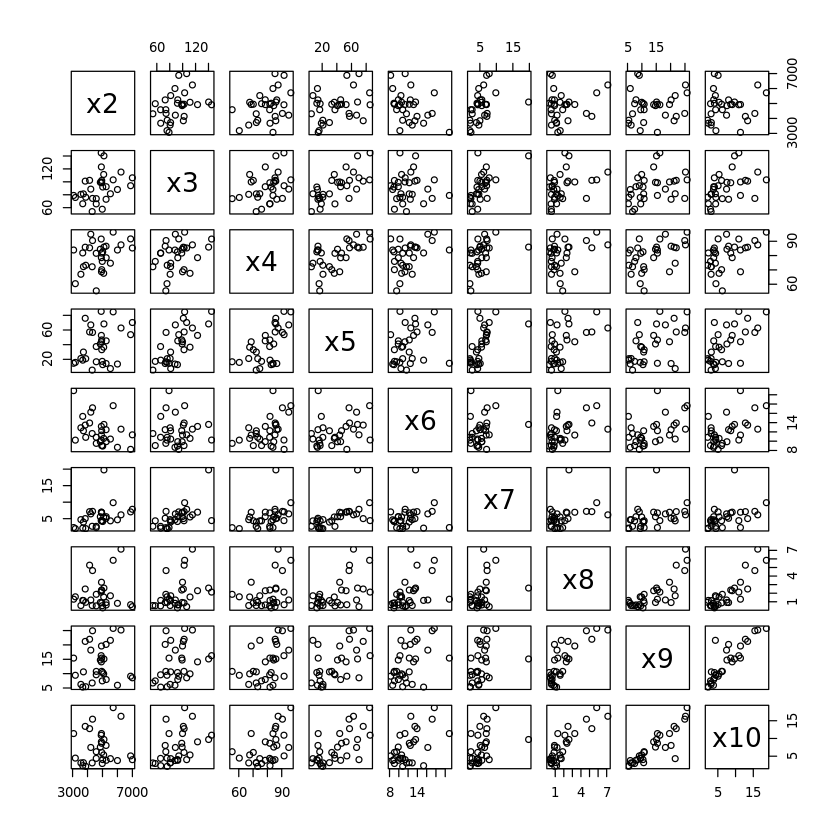

In [24]:
plot(d1)

### 导包绘制悬崖碎石图
- 决定计算的主成分数目

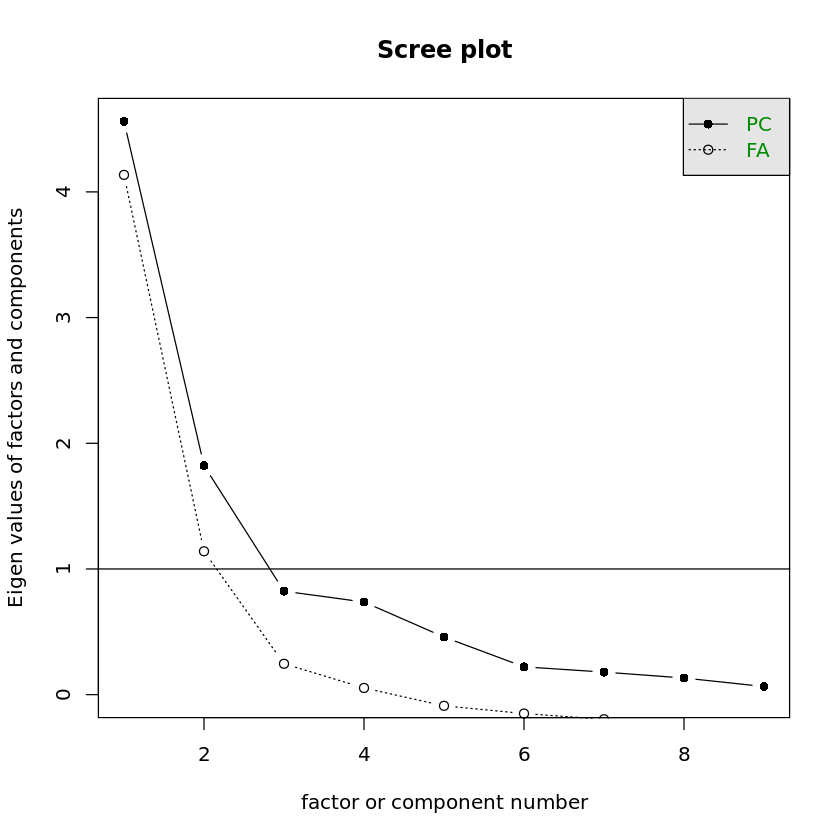

In [25]:
library(psych)
scree(d1)

### 选择主成分计算得分

In [26]:
pc=principal(d1,nfactors=4, score=TRUE)
pc

Principal Components Analysis
Call: principal(r = d1, nfactors = 4, scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
     RC1  RC4   RC3   RC2   h2    u2 com
x2  0.06 0.26  0.28  0.89 0.93 0.068 1.4
x3  0.22 0.89 -0.02  0.17 0.88 0.124 1.2
x4  0.24 0.27  0.90  0.09 0.94 0.057 1.3
x5  0.39 0.72  0.36  0.05 0.81 0.192 2.1
x6  0.41 0.03  0.47 -0.72 0.91 0.089 2.4
x7  0.16 0.80  0.24  0.07 0.73 0.267 1.3
x8  0.92 0.23  0.03 -0.02 0.90 0.095 1.1
x9  0.89 0.17  0.25 -0.04 0.89 0.115 1.2
x10 0.88 0.32  0.24 -0.13 0.95 0.050 1.5

                       RC1  RC4  RC3  RC2
SS loadings           2.87 2.29 1.41 1.37
Proportion Var        0.32 0.25 0.16 0.15
Cumulative Var        0.32 0.57 0.73 0.88
Proportion Explained  0.36 0.29 0.18 0.17
Cumulative Proportion 0.36 0.65 0.83 1.00

Mean item complexity =  1.5
Test of the hypothesis that 4 components are sufficient.

The root mean square of the residuals (RMSR) is  0.05 
 with the empirical chi square  4.62  with 

In [27]:
summary(pc)


Factor analysis with Call: principal(r = d1, nfactors = 4, scores = TRUE)

Test of the hypothesis that 4 factors are sufficient.
The degrees of freedom for the model is 6  and the objective function was  1.39 
The number of observations was  31  with Chi Square =  32.66  with prob <  1.2e-05 

The root mean square of the residuals (RMSA) is  0.05 


In [28]:
pc$score

,RC1,RC4,RC3,RC2
2,0.21444876,0.32657377,0.04036947,0.06659912
3,1.55866546,0.33039311,-0.21177058,-0.54169633
4,-0.35932395,0.24218438,1.88362504,-1.13641244
5,-0.63789263,-0.90493522,0.58207976,0.12833251
6,0.29372031,-1.20928968,1.02900038,0.54423994
7,-0.07895504,-0.55998612,-2.05389223,-0.86555613
8,-0.56739691,-0.17552689,-0.59967807,-0.87941711
9,-0.86507747,-0.59831713,-0.54686481,-0.48363511
10,-0.99351894,-0.95768809,0.78029540,-1.33421931
11,0.11013210,1.59096855,0.10304480,0.30467222


### 根据pc$score结果，产生综合因子F

In [29]:
F=2.87*pc$score[,1]+2.29*pc$score[,2]+1.41*pc$score[,3]+1.37*pc$score[,4]
newdata=data.frame(x1[-c(1,28)],d1,pc$score,F)

In [30]:
newdata

,x1..c.1..28..,x2,x3,x4,x5,x6,x7,x8,x9,x10,RC1,RC4,RC3,RC2,F
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,全国,4947,98.58,81.73,46.44,12.26,6.75,2.37,15.42,8.64,0.21444876,0.32657377,0.04036947,0.06659912,1.5114836
3,北京,4139,102.31,85.43,57.32,13.92,7.13,5.27,21.97,12.77,1.55866546,0.33039311,-0.21177058,-0.54169633,4.1892496
4,天津,4219,88.70,94.93,66.95,16.25,6.45,1.21,18.19,7.46,-0.35932395,0.24218438,1.88362504,-1.13641244,0.6223688
5,河北,4582,65.82,81.59,37.44,10.84,2.67,0.52,9.60,4.38,-0.63789263,-0.90493522,0.58207976,0.12833251,-2.9065055
6,山西,5240,72.98,86.57,14.28,12.48,5.12,0.91,20.17,8.03,0.29372031,-1.20928968,1.02900038,0.54423994,0.2702032
7,内蒙古,3185,75.77,60.38,15.80,10.23,1.99,1.58,9.43,4.46,-0.07895504,-0.55998612,-2.05389223,-0.86555613,-5.5907691
8,辽宁,3726,81.34,72.27,29.92,12.24,3.96,1.14,10.62,3.17,-0.56739691,-0.17552689,-0.59967807,-0.87941711,-4.0807332
9,吉林,3880,76.10,73.25,20.90,10.83,1.99,0.94,5.45,2.13,-0.86507747,-0.59831713,-0.54686481,-0.48363511,-5.2865781
10,黑龙江,3680,66.04,81.83,18.88,15.34,2.14,1.16,5.31,2.32,-0.99351894,-0.95768809,0.78029540,-1.33421931,-5.7721690


In [31]:
###数据集根据综合因子F排序
r=order(F)
newdata1=newdata[r,]
newdata1

,x1..c.1..28..,x2,x3,x4,x5,x6,x7,x8,x9,x10,RC1,RC4,RC3,RC2,F
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32,宁夏,3557,80.61,66.96,21.12,12.89,4.71,0.56,6.26,3.10,-0.98739242,0.06073347,-0.92944805,-1.30296068,-5.7903145
10,黑龙江,3680,66.04,81.83,18.88,15.34,2.14,1.16,5.31,2.32,-0.99351894,-0.95768809,0.78029540,-1.33421931,-5.7721690
30,甘肃,4311,53.91,72.19,5.30,11.65,2.69,0.56,6.75,3.10,-0.68080068,-1.38943220,-0.11991395,-0.21818998,-5.6036966
7,内蒙古,3185,75.77,60.38,15.80,10.23,1.99,1.58,9.43,4.46,-0.07895504,-0.55998612,-2.05389223,-0.86555613,-5.5907691
9,吉林,3880,76.10,73.25,20.90,10.83,1.99,0.94,5.45,2.13,-0.86507747,-0.59831713,-0.54686481,-0.48363511,-5.2865781
8,辽宁,3726,81.34,72.27,29.92,12.24,3.96,1.14,10.62,3.17,-0.56739691,-0.17552689,-0.59967807,-0.87941711,-4.0807332
33,新疆,3071,78.92,83.90,14.60,20.89,2.31,1.30,15.41,11.38,0.17817074,-0.94900728,1.08928795,-2.61606451,-3.7099890
29,陕西,4986,57.59,75.92,17.22,9.06,4.35,0.54,7.48,2.94,-0.74077113,-1.07235902,0.05142765,0.68558510,-3.5699507
31,青海,4585,73.96,55.37,16.67,9.53,2.28,1.87,10.78,6.27,0.44342277,-0.80526383,-2.25243244,0.31774625,-3.3120482


In [32]:
###数据集根据第一主成分排序
r1=order(pc$score[,1])
newdata2=newdata[r1,]
# newdata2
newdata2=newdata2[,c(1,11:15)]
newdata2

,x1..c.1..28..,RC1,RC4,RC3,RC2,F
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,广西,-1.14566115,0.96358101,1.14690432,1.38594456,2.4344321
10,黑龙江,-0.99351894,-0.95768809,0.78029540,-1.33421931,-5.7721690
32,宁夏,-0.98739242,0.06073347,-0.92944805,-1.30296068,-5.7903145
25,四川,-0.92716518,0.32440181,0.01311886,0.50015936,-1.2143680
24,重庆,-0.88145465,0.18571589,1.33079415,2.07841747,2.6193662
9,吉林,-0.86507747,-0.59831713,-0.54686481,-0.48363511,-5.2865781
27,云南,-0.85449582,-0.51455910,0.42613550,1.46129876,-1.0279130
26,贵州,-0.75072596,-0.41523247,0.10908179,0.71998511,-1.9652809
29,陕西,-0.74077113,-1.07235902,0.05142765,0.68558510,-3.5699507


In [33]:
###生成excel
write.csv(newdata2,'mynewdata.csv')